# Machine Learning /Linear Regression Problem
      By Eng-Janvier NIYITEGEKA
      email: nijas2012@yahoo.com
        Data scientist
        MSc.IoT-ECS /UR-ACEIoT
      Assistant Lecturer/IPRC TUMBA


A machine learning problem becomes a linear regression problem when the target or the output variables are continuous.

This work aims to explore the Bosto House price dataset and train a machine learning algorithm to predict the price of the new house baed on the learning experience.

Let import the python packages that will help to explore the data and build a machine learning algorithm to generate the house predictive model.

In [5]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston
import seaborn as sbn
from sklearn import metrics

In this tutorial we are going to use the boston  dataset from the sklearn.datasets container. Secondly we are going to use LinearRegression ,Lasso and Ridge as a machine learning algorithms to build a predictive model for predicting the cost of the given house using house features. Rdge and Lasso are used for preventing the model from overfitting.

In [8]:
L_model=LinearRegression()
R_model =Ridge()
Las=Lasso()
boston=load_boston()

# EXPLORING DATA

In [9]:
dir(boston)

['DESCR', 'data', 'feature_names', 'filename', 'target']

let check the shape of the input features

In [10]:
df=boston.data
df.shape

(506, 13)

In [11]:
df[:10]

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, 0.0000e+00, 5.3800e-01,
        6.5750e+00, 6.5200e+01, 4.0900e+00, 1.0000e+00, 2.9600e+02,
        1.5300e+01, 3.9690e+02, 4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        6.4210e+00, 7.8900e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9690e+02, 9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        7.1850e+00, 6.1100e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9283e+02, 4.0300e+00],
       [3.2370e-02, 0.0000e+00, 2.1800e+00, 0.0000e+00, 4.5800e-01,
        6.9980e+00, 4.5800e+01, 6.0622e+00, 3.0000e+00, 2.2200e+02,
        1.8700e+01, 3.9463e+02, 2.9400e+00],
       [6.9050e-02, 0.0000e+00, 2.1800e+00, 0.0000e+00, 4.5800e-01,
        7.1470e+00, 5.4200e+01, 6.0622e+00, 3.0000e+00, 2.2200e+02,
        1.8700e+01, 3.9690e+02, 5.3300e+00],
       [2.9850e-02, 0.0000e+00, 2.1800e+00, 0.0000e+00, 4.5800e-01,
        6.4300e+00, 5.8700e

The dadaset contains only 506 samples or rows and 13 columns

Letcheck the names of the columns

In [12]:
columns=boston.feature_names
print(columns)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


The input features are : 'CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT'

let check the shape of the target variable

In [13]:
target = boston.target
target.shape,target

((506,),
 array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
        19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
        20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
        23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
        33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
        21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
        20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
        23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
        15.6, 11.8, 13.8, 15.

The target variable are continuous values hence linear regression problem

Now we are going to build a pandasdataframe of the iris dataset using pandas python package

In [14]:
df=pd.DataFrame(boston.data,columns=boston.feature_names)
df.shape

(506, 13)

Let print first five rows of the pndasdataframe constructed

In [15]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


Let add the target column on the this pandas dataframe

In [16]:
df['target']=boston.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


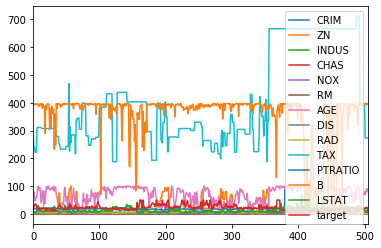

In [17]:
df.plot()

# START MODEL TRAINING

splitting the data into inputs and output

In [21]:
X=df.iloc[:,:13]
Y=df.target
X.shape,Y.shape

((506, 13), (506,))

In [23]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


dividing the dataset into taining and testing dataset 

In [24]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.15,random_state=42)

85 percent and 15 percent of the data are used training and testing respectively.

Let fit the model with training inputs and training output variables

1. Use LinearRegression model

In [25]:
L_model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [26]:
L_model=L_model.fit(x_train,y_train)

Making Prediction

In [30]:
pred = L_model.predict(x_test)

In [31]:
pred

array([29.4299146 , 36.12913024, 14.29515659, 24.85869473, 18.9459364 ,
       23.33181044, 17.56304359, 13.64580456, 23.76767942, 20.67064862,
       24.97566126, 18.64115832, -5.37529568, 21.53577018, 19.55628157,
       26.20738657, 20.71765252,  6.43165738, 40.54410761, 17.84455626,
       27.23309618, 30.3543635 , 11.18673244, 23.7090171 , 18.4391652 ,
       16.89075459, 22.82856829, 14.88561852, 22.4084684 , 19.26626721,
       23.20312101, 25.09863053, 25.77705635, 18.73128221, 17.35488263,
       16.92397997, 30.81465816, 20.11645382, 23.47005166, 24.25945046,
       13.99527168, 32.81595458, 42.84191019, 17.36577587, 27.36376775,
       17.65205456, 14.17099713, 25.45190626, 20.76675071, 30.06772594,
       21.45925197, 34.42220955, 15.74704153, 25.99425554, 39.49038628,
       22.82111596, 19.13064128, 33.1975165 , 24.9068507 , 13.02579225,
       22.28159258, 30.44316337, 31.60763587, 16.03484901, 19.92414044,
       16.88585295, 20.74312801, 26.06425151, 31.03448877, 12.34

model Evaluation

In [32]:
print("Training score={:.3f}".format(L_model.score(x_train,y_train)))
print("Test Score={:.3f}".format(L_model.score(x_test,y_test)))

Training score=0.732
Test Score=0.790


2.  Use Ridge model

In [33]:
R_model

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [67]:
R_model=Ridge(alpha = 1,random_state=42,max_iter=1000)

In [68]:
model=R_model.fit(x_train,y_train)

Making Prediction

In [69]:
pred = L_model.predict(x_test)
pred

array([29.4299146 , 36.12913024, 14.29515659, 24.85869473, 18.9459364 ,
       23.33181044, 17.56304359, 13.64580456, 23.76767942, 20.67064862,
       24.97566126, 18.64115832, -5.37529568, 21.53577018, 19.55628157,
       26.20738657, 20.71765252,  6.43165738, 40.54410761, 17.84455626,
       27.23309618, 30.3543635 , 11.18673244, 23.7090171 , 18.4391652 ,
       16.89075459, 22.82856829, 14.88561852, 22.4084684 , 19.26626721,
       23.20312101, 25.09863053, 25.77705635, 18.73128221, 17.35488263,
       16.92397997, 30.81465816, 20.11645382, 23.47005166, 24.25945046,
       13.99527168, 32.81595458, 42.84191019, 17.36577587, 27.36376775,
       17.65205456, 14.17099713, 25.45190626, 20.76675071, 30.06772594,
       21.45925197, 34.42220955, 15.74704153, 25.99425554, 39.49038628,
       22.82111596, 19.13064128, 33.1975165 , 24.9068507 , 13.02579225,
       22.28159258, 30.44316337, 31.60763587, 16.03484901, 19.92414044,
       16.88585295, 20.74312801, 26.06425151, 31.03448877, 12.34

Model Evaluation

In [70]:
print("Training score={:.3f}".format(model.score(x_train,y_train)))
print("Test Score={:.3f}".format(model.score(x_test,y_test)))

Training score=0.730
Test Score=0.797


3. Using Lasso model

In [71]:
Las

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [95]:
Las=Lasso(alpha=0.001,random_state=42)

In [96]:
model=Las.fit(x_train,y_train)

making prediction

In [97]:
pred = model.predict(x_test)
pred

array([29.41775834, 36.1035268 , 14.26902662, 24.8480235 , 18.96249303,
       23.29396483, 17.56159026, 13.64191246, 23.72976774, 20.67849525,
       24.93363384, 18.63701241, -5.38080512, 21.50764688, 19.55585949,
       26.20098202, 20.70025109,  6.42991415, 40.54025926, 17.8591279 ,
       27.24109737, 30.34806616, 11.19112405, 23.72923298, 18.45476184,
       16.86240505, 22.80420883, 14.89854615, 22.36556048, 19.27838699,
       23.18557055, 25.10599208, 25.77818723, 18.7689221 , 17.32451791,
       16.98607812, 30.8133098 , 20.14167422, 23.43865558, 24.24774969,
       14.00147754, 32.81149151, 42.83360523, 17.35332686, 27.35969068,
       17.66106253, 14.17579388, 25.44076361, 20.74412322, 30.08169485,
       21.45668295, 34.41364381, 15.75386775, 25.99774952, 39.50244224,
       22.81581358, 19.15315791, 33.19969838, 24.90262721, 13.01649429,
       22.29719355, 30.46244393, 31.61325747, 16.05757577, 19.94521052,
       16.83695995, 20.74884728, 26.06290994, 31.04416035, 12.35

In [98]:
print("Training score={:.3f}".format(model.score(x_train,y_train)))
print("Test Score={:.3f}".format(model.score(x_test,y_test)))

Training score=0.732
Test Score=0.790


Regularization is the techniques used by AI engineer to reduce model complexity and prevent over-fitting which may result from simple linear regression.

From the result of the problem given above by using Ridge Regression which added L2 regularization term to MSE(Mean Squared Error) of the normal Linear Regression problem, the regularization reduces the training weights of the model to the value closer to zero

This means that the regularization in machine learning decreases the effect of higher weights for avoiding the overfitting problem during of training.

Thank you for following this tutorial. See you in next Tutorials